In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finoptions as fo
import warnings
warnings.filterwarnings('ignore')
import itertools
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
from bin_tree_plotter import BiTreePlotter


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


IndexError: string index out of range

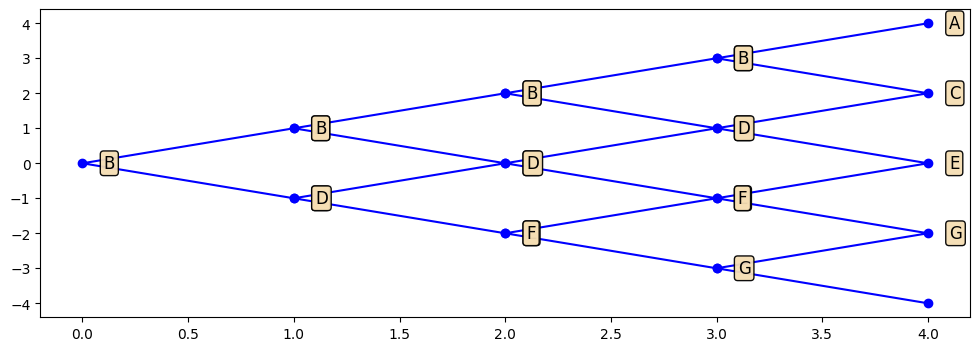

In [11]:
def binomial_tree_asset_prices(S, T, r, sigma, n):
    # Calcula os fatores de alta (up) e baixa (down) para a árvore binomial
    up = np.exp(sigma * np.sqrt(T / n))
    down = np.exp(-sigma * np.sqrt(T / n))

    # Inicializa a matriz de preços dos ativos em cada nó
    asset_prices = np.zeros((n + 1, n + 1))

    # Preenche a matriz com os preços dos ativos em cada nó
    for i in range(n + 1):
        for j in range(i + 1):
            asset_prices[j, i] = S * (up ** (i - j)) * (down ** j)

    # Retorna a matriz de preços dos ativos em cada nó
    return asset_prices

S = 100
K = 100
T = 12/12
r = 0.1
d = 0.15
sigma = 0.2
n = 5
type='european'

R = (1+r)**(T/n)
D = (1+d)**(T/n)

up = np.exp(sigma*np.sqrt(T/n))
down = np.exp(-sigma*np.sqrt(T/n))

q = (R/D-down)/(up-down)

asset_prices = binomial_tree_asset_prices(S, T, r, sigma, n)

# PLota o gráfico
_ = BiTreePlotter(asset_prices).plot(title='Asset Prices')


options = np.clip(asset_prices-K, 0, np.inf)
for i in np.arange(len(options)-2, -1, -1):
    prices_node = options[::,i+1]
    option_prices = options[::,i][:i+1]
    for idx, node_opt in enumerate(option_prices):
        vup, vdown =  prices_node[idx:idx+2]
        v = (1/R)*(q*vup+(1-q)*vdown)
        options[idx, i] = v

_ = BiTreePlotter(options).plot(title='Option Prices', shade_step=3)


T = 3
n = 5


R = (1+r)**(T/n)
D = (1+d)**(T/n)

call_on_call = np.clip(options-7, 0, np.inf)[:,:T+1][:T+1]
for i in np.arange(len(call_on_call)-2, -1, -1):
    prices_node = call_on_call[::,i+1]
    option_prices = call_on_call[::,i][:i+1]
    for idx, node_opt in enumerate(option_prices):
        vup, vdown =  prices_node[idx:idx+2]
        v = (1/R)*(q*vup+(1-q)*vdown)
        call_on_call[idx, i] = v

_ = BiTreePlotter(call_on_call).plot(title='Call on Call Prices')

In [2]:
call_on_call[0][0]

2.1035768654203375

0.06253927842517272